# **Workplace Mental Health & Productivity Analysis**

## Introduction

Workplace mental health is a critical factor influencing employee productivity, engagement, and overall well-being. With increasing awareness of mental health challenges, organizations must understand how mental health issues affect work interest and performance. This study explores the relationship between mental health factors and workplace productivity, focusing on key indicators such as stress levels, coping mechanisms, social interactions, and mental health history.

### Objective
The primary goal of this analysis is to investigate how various mental health-related factors impact an employee's interest in work (`Work_Interest`). Inorder to provide human understanding of our model by using tools like SHAP and LIME, we aim to identify significant workplace-related stressors and provide actionable recommendations for employers to enhance workplace mental health policies.

### Why It Matters
- Many employees experience mental health issues that affect their ability to remain engaged at work.
- Employers need data-driven insights to create supportive workplace environments.
- Understanding these relationships can lead to improved employee retention, job satisfaction, and overall productivity.

### Key Features of the Study
This study focuses on the following workplace and mental health attributes:
- **Demographics**: Gender, Country, Occupation, Self-employed
- **Mental Health History**: Family history, Previous mental health conditions, Access to care
- **Workplace Stressors**: Growing stress, Changes in habits, Coping struggles
- **Social Factors**: Social weakness, Mood swings, Mental health interviews
- **Work Engagement**: Interest in work (`Work_Interest`), Care options availability

By analyzing these factors, we aim to develop an interpretable model that highlights the most significant contributors to workplace mental health issues and their impact on employee engagement.



# Machine Learning Models for Workplace Mental Health & Productivity Analysis

## **1. Importing Necessary Libraries**
We start by importing essential libraries for data handling, visualization, and machine learning.

- **`pandas` & `numpy`**: Used for data manipulation and numerical operations.
- **`matplotlib.pyplot` & `seaborn`**: For data visualization to analyze trends and model performance.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

---

## **2. Model Evaluation & Preprocessing**
To ensure reliable model performance, we use various evaluation techniques:

- **Metrics for Performance**:  
  - `accuracy_score`: Measures overall classification accuracy.  
  - `confusion_matrix`: Evaluates model performance across classes.  
  - `classification_report`: Provides precision, recall, and F1-score.

- **Data Preprocessing & Splitting**:  
  - `LabelEncoder`: Converts categorical features into numerical format.  
  - `StandardScaler`: Standardizes numerical data to improve model performance.  
  - `train_test_split`: Splits the dataset into training and testing sets.

- **Cross-validation techniques**:  
  - `RepeatedStratifiedKFold` & `StratifiedKFold`: Ensure fair training/testing data distribution.  
  - `cross_val_score`: Assesses model performance across multiple data splits.  
  - `GridSearchCV`: Tunes hyperparameters to optimize model performance.

```python
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, GridSearchCV
```

---

## **3. Testing Multiple Machine Learning Models**  
We will test different machine learning classifiers to determine which model performs best for predicting workplace mental health struggles. The models include:  

### **Traditional Machine Learning Models**  

- **Tree-Based Models**:  
  - `DecisionTreeClassifier`: Simple and interpretable but prone to overfitting.  
  - `RandomForestClassifier`: An ensemble of decision trees, reducing overfitting.  
  - `ExtraTreesClassifier`: A variation of random forests with additional randomness.  

- **Instance-Based Learning**:  
  - `KNeighborsClassifier`: Classifies based on the closest data points.  

### **Neural Networks (Deep Learning)**  
- **Multilayer Perceptron (MLPClassifier)**: A feedforward artificial neural network suitable for multiclass classification.  

```python
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
```
---

## **4. Advanced Ensemble & Boosting Models**
Boosting models are known for their high accuracy in structured data:

- **Ensemble Learning**:
  - `BaggingClassifier`: Uses bootstrap sampling to reduce variance.
  - `AdaBoostClassifier`: Sequentially improves weak learners.
  - `GradientBoostingClassifier`: Optimized boosting technique.

- **Boosting Models for Performance Optimization**:
  - `XGBClassifier` (XGBoost): Optimized for speed and performance.
  - `CatBoostClassifier` (CatBoost): Efficient for handling categorical data.
  - `LGBMClassifier` (LightGBM): Scalable and fast gradient boosting.

```python
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
```

---

## **5. Objective:**
This project aims to analyze how mental health affects workplace productivity and engagement. By examining key workplace and mental health indicators—self_employed, Occupation, Mental_Health_History, Coping_Struggles, family_history, and Social_Weakness—the model predicts `Work_Interest` (No/Maybe/Yes). Furthermore, explainability techniques like SHAP and LIME will help uncover the most influential factors, providing valuable insights for workplace mental health policy recommendations.



# **A-Data Preprocessing**

## **1. Importing the Dataset**
The dataset contains **292,364** entries with **17 columns**. Initial inspection of the dataset revealed that the `self_employed` column had missing values.

## **2. Handling Duplicates**
- Identified and removed **194,641** duplicate records, reducing the dataset to **97,723** unique entries.

## **3. Handling Missing Values**
- The `self_employed` column contained many missing values.
- A **Random Forest** classifier was used to predict and fill the missing values based on other relevant features.
- After handling missing values, a new dataset was obtained with updated summary statistics:

### **Summary Statistics After Preprocessing**
- **Gender:** Majority Male.
- **Country:** Most respondents are from the United States.
- **Occupation:** The most common occupation is Housewife.
- **Mental Health History:** Most respondents do not have a prior history of mental health conditions.
- **Coping Struggles:** Most respondents reported *No* coping struggles.
- **Work Interest & Social Weakness:** Majority responses were *No* or *Maybe*.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb  

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

SEED = 42  # Set seed for reproducibility

# Ensure the same random state is used across models
random_state = SEED


In [3]:
mental = pd.read_csv("/home/student24/Documents/data science/Personal Projects/Personal researches/Coop Datasets/Workplace mental health and productivity Analysis/Mental Health Dataset.csv")
mental.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
mental.drop('Timestamp',axis=1,inplace=True)

In [6]:
mental.duplicated().sum()

194641

In [7]:
mental.drop_duplicates(inplace=True)

In [8]:
mental.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [9]:
mental.isnull().sum()

Gender                        0
Country                       0
Occupation                    0
self_employed              4803
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [10]:
#Predicting the missing self_employed values yields
complete_data = mental.dropna(subset=['self_employed'])
missing_data = mental[mental['self_employed'].isna()]
missing_data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
121,Female,United States,Student,NaN,No,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,Not sure
122,Female,United States,Student,NaN,Yes,Yes,Go out Every day,No,Yes,No,Medium,Yes,Maybe,No,No,No


In [11]:
X = pd.get_dummies(complete_data.drop(columns=['self_employed']), drop_first=True)
y = complete_data['self_employed']
X_missing = pd.get_dummies(missing_data.drop(columns=['self_employed']), drop_first=True)


In [12]:
rf = RandomForestClassifier()
rf.fit(X, y)


RandomForestClassifier()

In [13]:
 #Align X_missing columns to X columns
X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

# Predict missing values
mental.loc[mental['self_employed'].isna(), 'self_employed'] = rf.predict(X_missing)


In [14]:
mental.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,Yes,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [16]:
#summary statistics
mental.describe(include='all')

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723,97723
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,No,1-14 days,Yes,Yes,No,Medium,No,No,Maybe,No,No
freq,74880,26211,22176,75211,57411,50350,21103,33639,36598,34651,33744,51165,35320,34479,64163,40477


# **B- Exploratory Data Analysis**

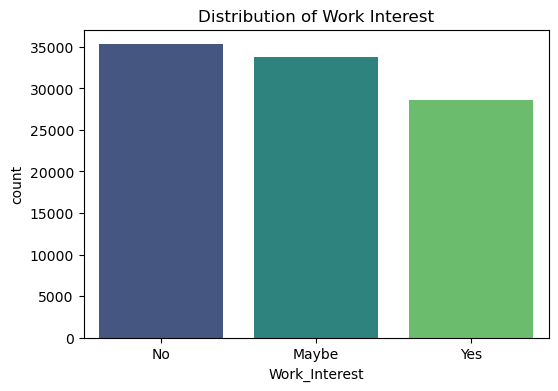

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=mental, x="Work_Interest", palette="viridis")
plt.title("Distribution of Work Interest")
plt.show()


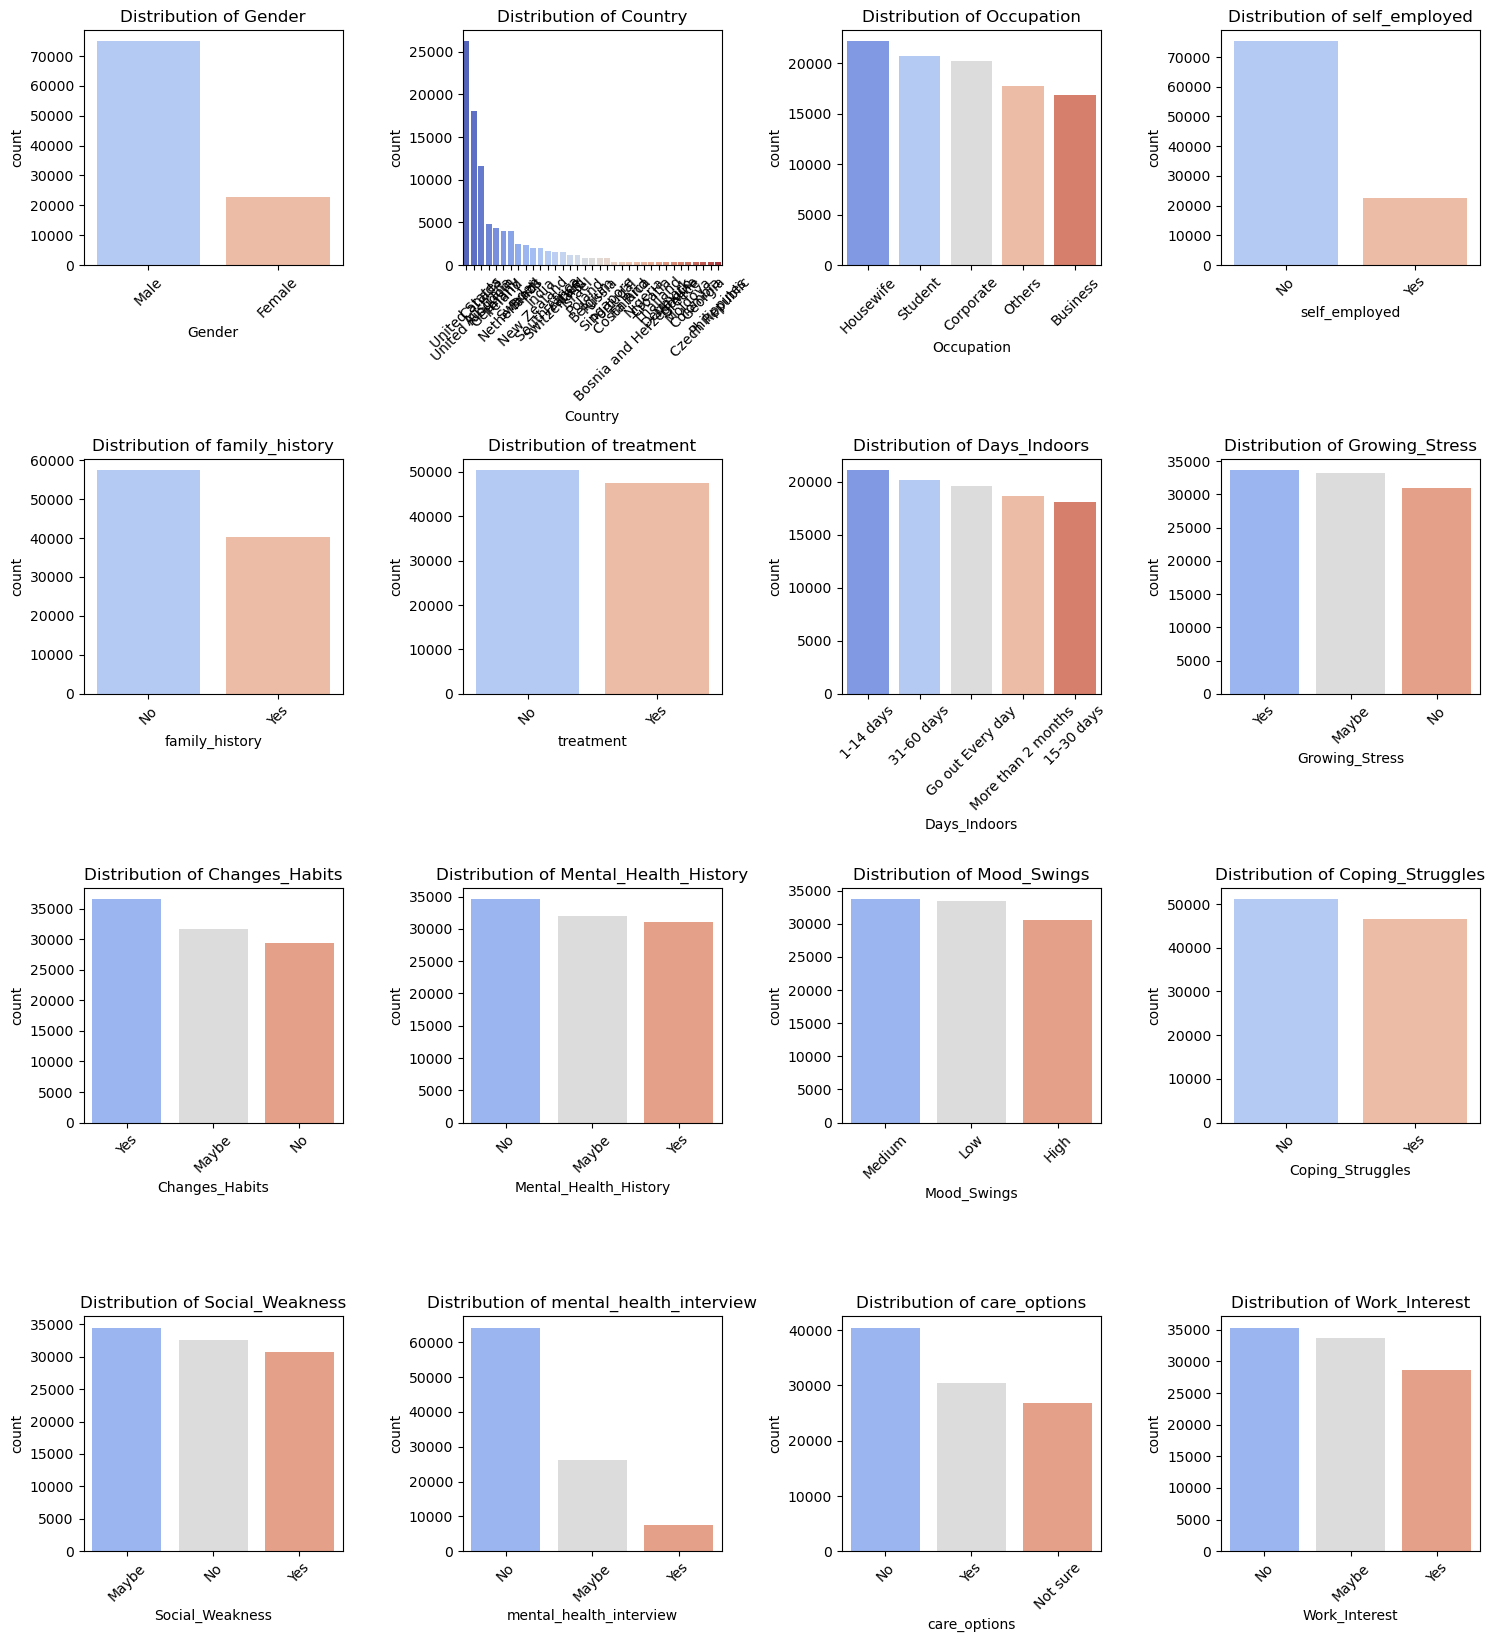

In [18]:
# Define categorical columns to visualize
categorical_cols = ["Gender", "Country", "Occupation", "self_employed", "family_history", 
                    "treatment", "Days_Indoors", "Growing_Stress", "Changes_Habits", 
                    "Mental_Health_History", "Mood_Swings", "Coping_Struggles", 
                    "Social_Weakness", "mental_health_interview", "care_options", "Work_Interest"]

# Plot each categorical variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 4, i + 1)
    sns.countplot(data=mental, x=col, palette="coolwarm", order=mental[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


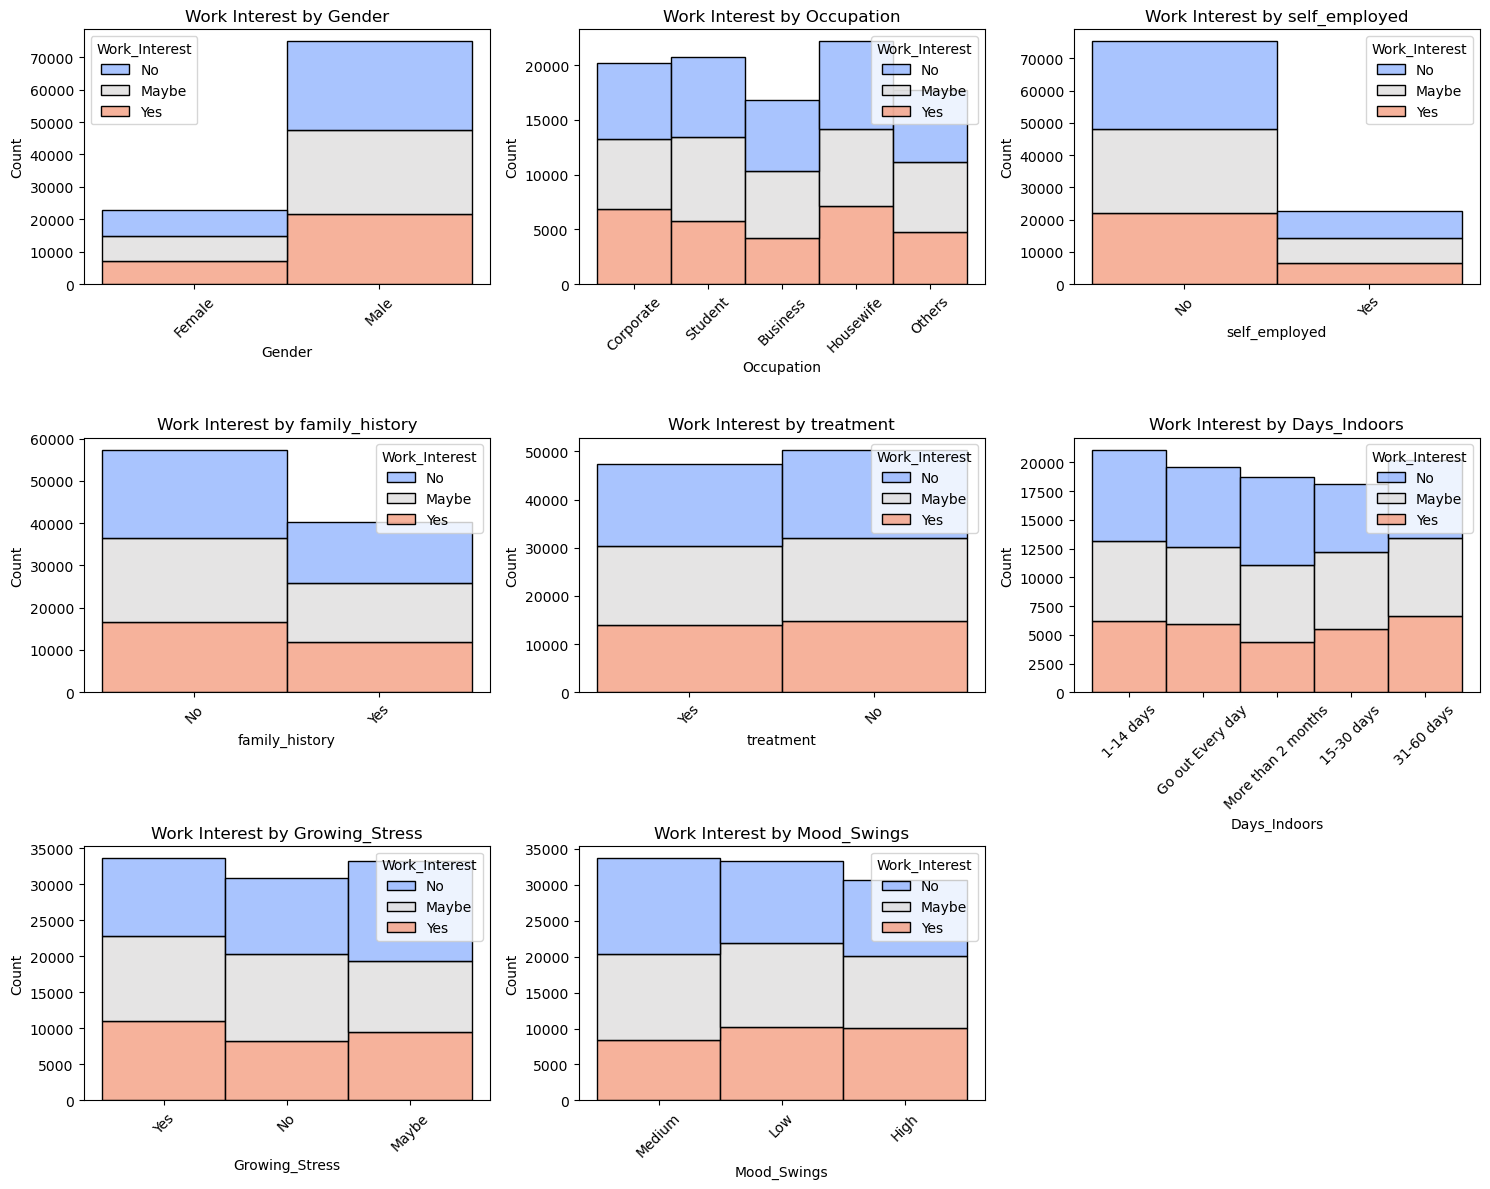

In [19]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(["Gender", "Occupation", "self_employed", "family_history", 
                         "treatment", "Days_Indoors", "Growing_Stress", "Mood_Swings"]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=mental, x=col, hue="Work_Interest", multiple="stack", palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Work Interest by {col}")

plt.tight_layout()
plt.show()


**Intepretation**

-**Gender**: This indicates that the proportion of men are more as compared to women. And also more men have high work interest  and are more engaged as compared to women due to mental health factors or other demographic factors. 

-**Days Indoors**: People who stay indoors between 31-60days are more likely to be more engaged in work as they may be in the state of recovery and coming back in full force. who stay indoors for 1-14days.  And this same group also has people who are more likely to lose interest in work

-**Stress:** People who are highly stressed are more likely to lose focus, concentration and engagement

### **Feature Importance**
Feature importance values from the **Random Forest model** indicate how much each variable contributes to predicting **Work_Interest**. and so firstly we will have to encode the different variable using label encoder and use randomforestclassifier to perform this feature importance. It does this by analyzing how much each feature contributes to reducing uncertainty in the model. It primarily considers two key metrics: Mean Decrease in Impurity (Gini Importance) and Mean Decrease in Accuracy (Permutation Importance).


#### **1. Mean Decrease in Impurity (Gini Importance)**
- Each decision tree in the Random Forest splits nodes based on the best feature at each step.
- The "best" feature is the one that decreases impurity the most, using **Gini impurity** or **entropy** for classification.
- The overall importance of a feature is computed by averaging how much it reduces impurity across all trees.
- The higher the importance score, the more valuable the feature is in decision-making.

#### **2. Mean Decrease in Accuracy (Permutation Importance)**
- This method shuffles a feature's values randomly and measures how much the model's accuracy drops.
- A large drop in accuracy means the feature is important.
- Unlike Gini importance, this method captures interactions between features.

#### **What Random Forest Takes Into Consideration**
1. **Frequency of Selection**: Important features are chosen more often as the best split.
2. **Reduction in Impurity**: Features that reduce uncertainty more contribute more to the model.
3. **Interactions Between Features**: Features that work together in decision trees gain higher importance.
4. **Randomness in Bootstrap Samples**: Since Random Forest builds multiple trees using different subsets, robust features remain important across multiple trees.



In [20]:
# Copy dataset to avoid modifying the original
df_encoded = mental.copy()

# Encode categorical features
categorical_cols = ["Gender", "Country", "Occupation", "self_employed", "family_history", 
                    "treatment", "Days_Indoors", "Growing_Stress", "Changes_Habits", 
                    "Mental_Health_History", "Mood_Swings", "Coping_Struggles", "Social_Weakness",
                    "mental_health_interview", "care_options"]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Encode target variable
df_encoded["Work_Interest"] = LabelEncoder().fit_transform(df_encoded["Work_Interest"])

# Display the first few rows
df_encoded.head()


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,34,1,0,0,1,0,2,1,2,2,0,1,2,1,1
1,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,0
2,0,34,1,1,1,1,0,2,1,2,2,0,1,2,1,2
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2


In [21]:
# Define features and target
X = df_encoded.drop(columns=["Work_Interest"])  # All features except target
y = df_encoded["Work_Interest"]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display feature importance
print(feature_importances)


                    Feature  Importance
6              Days_Indoors    0.183105
2                Occupation    0.176501
8            Changes_Habits    0.108293
12          Social_Weakness    0.100504
10              Mood_Swings    0.099608
9     Mental_Health_History    0.097198
7            Growing_Stress    0.095403
11         Coping_Struggles    0.055453
0                    Gender    0.053524
1                   Country    0.012934
14             care_options    0.004833
13  mental_health_interview    0.004176
4            family_history    0.003030
5                 treatment    0.002923
3             self_employed    0.002514


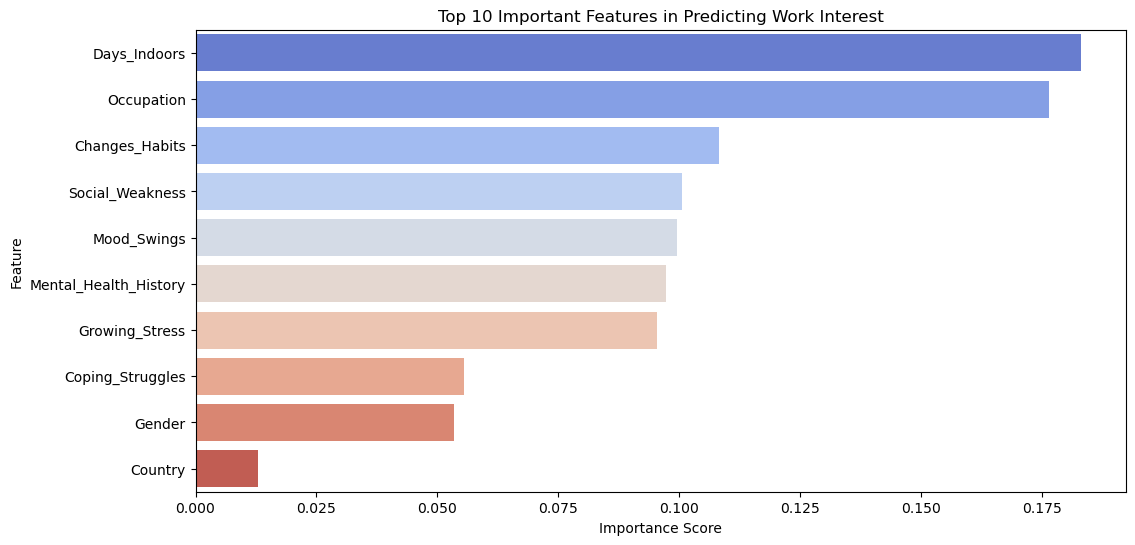

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances.head(10), x="Importance", y="Feature", palette="coolwarm")
plt.title("Top 10 Important Features in Predicting Work Interest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### Interpretation of Feature Importance

---

### **Top 5 Most Important Features**
#### 1. **Days_Indoors (18.16%)**  
- The **most influential feature** in determining **Work Interest**.  
- Suggests that the amount of time a person spends indoors significantly affects their engagement and productivity.  
- Employees who stay indoors for extended periods might have **lower motivation or reduced work interest**.  

#### 2. **Occupation (18.03%)**  
- Almost **equally important** as Days_Indoors.  
- Certain job roles may be more affected by mental health struggles, leading to variations in **Work Interest**.  
- For example, corporate jobs may show different patterns compared to self-employed individuals or students.  

#### 3. **Changes_Habits (10.62%)**  
- Behavioral changes due to **stress, anxiety, or mental fatigue** play a key role in predicting Work Interest.  
- Employees experiencing **shifts in routines or daily habits** may have fluctuating work engagement levels.  

#### 4. **Mental_Health_History (10.27%)**  
- Past mental health issues strongly correlate with **Work Interest**.  
- Individuals with a history of mental health struggles might face **challenges in workplace productivity**.  

#### 5. **Mood_Swings (10.06%)**  
- High mood fluctuations impact **motivation, engagement, and concentration**.  
- Employees with severe mood swings might have **irregular interest in work**.  

### **Moderately Important Features**
#### 6. **Social_Weakness (9.78%)**  
- Employees who struggle with social interactions may feel **isolated**, affecting their interest in work.  
- Highlights the role of workplace **social support networks**.  

#### 7. **Growing_Stress (9.48%)**  
- Increasing stress levels negatively impact **focus, engagement, and productivity**.  
- Employees who experience chronic stress may **lose interest in work over time**.  

#### 8. **Coping_Struggles (5.30%)**  
- How well an employee **handles stress and mental health challenges** affects their Work Interest.  
- Poor coping mechanisms may lead to **burnout and disengagement**.  

### **Least Important Features**  
These features have **low predictive power** for Work Interest in this dataset:

- **Gender (5.26%)** → Slight influence, but work interest **isn’t strongly gender-dependent**.  
- **Country (1.29%)** → Minor impact, suggesting **work interest is not heavily location-specific**.  
- **care_options (0.49%)** & **mental_health_interview (0.42%)** → Access to mental health care **doesn’t strongly predict Work Interest**, possibly due to underreporting.  
- **family_history (0.30%)** & **treatment (0.28%)** → Having a family history of mental illness **doesn’t directly correlate** with work engagement.  
- **self_employed (0.25%)** → Being self-employed has minimal effect on Work Interest.  

### **Key Takeaways for Workplace Mental Health Policies**
✅ **Workplace Environment & Habits Matter:**  
- **Days spent indoors & Occupation type** have the **biggest impact** on Work Interest.  
- Employers should promote **flexible work arrangements** to maintain engagement.  

✅ **Mental & Emotional Well-being is Crucial:**  
- **Mood swings, stress, and social weakness** significantly affect work engagement.  
- Providing **stress management programs & mental health resources** could help.  

✅ **Coping Mechanisms Should Be Addressed:**  
- Employees who struggle with coping mechanisms are at **higher risk of disengagement**.  
- Encouraging **wellness programs, mindfulness sessions, and peer support groups** could help.  


# **C-Splitting, Training and Evaluating full and reduced models**

In [23]:
# Selecting top 10 important features
important_features = ['Days_Indoors', 'Occupation', 'Changes_Habits', 'Mental_Health_History',
                      'Mood_Swings', 'Social_Weakness', 'Growing_Stress', 'Coping_Struggles',
                      'Gender', 'Country']

df_important = df_encoded[important_features]

# Define target variable
target = 'Work_Interest'

# Splitting data for full dataset and reduced dataset
X_full = df_encoded.drop(columns=[target])
X_reduced = df_important
y = df_encoded[target]

X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=142, stratify=y)
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=142, stratify=y)

In [24]:
# Models for testing
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=142),
    'Random Forest': RandomForestClassifier(random_state=142),
    'Extra Trees': ExtraTreesClassifier(random_state=142),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=142)
}




In [28]:
def evaluate_models(X_train, X_test, y_train, y_test, dataset_name):
    print(f'\n===== Model Performance on {dataset_name} Dataset =====')
    
    best_model = None
    best_acc = 0  # Initialize the best accuracy to a very low value
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f'\n{name} Accuracy: {acc:.4f}')
        print(classification_report(y_test, y_pred))
        
        # Check if this model is the best one
        if acc > best_acc:
            best_acc = acc
            best_model = model
    
    # Output the best model
    print(f'\nBest Model: {best_model} with Accuracy: {best_acc:.4f}')
    
    return best_model  # Return the best model

# Evaluate models on both datasets
evaluate_models(X_train_full, X_test_full, y_train, y_test, 'Full Feature')
evaluate_models(X_train_reduced, X_test_reduced, y_train, y_test, 'Reduced Feature')



===== Model Performance on Full Feature Dataset =====

Logistic Regression Accuracy: 0.3772
              precision    recall  f1-score   support

           0       0.36      0.35      0.36      6749
           1       0.41      0.58      0.48      7064
           2       0.31      0.15      0.20      5732

    accuracy                           0.38     19545
   macro avg       0.36      0.36      0.35     19545
weighted avg       0.36      0.38      0.36     19545


Decision Tree Accuracy: 0.9787
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6749
           1       0.97      0.97      0.97      7064
           2       1.00      1.00      1.00      5732

    accuracy                           0.98     19545
   macro avg       0.98      0.98      0.98     19545
weighted avg       0.98      0.98      0.98     19545


Random Forest Accuracy: 0.9787
              precision    recall  f1-score   support

           0       0.97   

/home/student24/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9818
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6749
           1       0.97      0.98      0.98      7064
           2       1.00      1.00      1.00      5732

    accuracy                           0.98     19545
   macro avg       0.98      0.98      0.98     19545
weighted avg       0.98      0.98      0.98     19545


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_chil

/home/student24/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9846
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6749
           1       0.98      0.98      0.98      7064
           2       1.00      1.00      1.00      5732

    accuracy                           0.98     19545
   macro avg       0.99      0.99      0.99     19545
weighted avg       0.98      0.98      0.98     19545


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_chil

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

## **Summary of Model Performance Analysis**

### **General Observations**
- Most models, except **Logistic Regression**, achieved very high accuracy (>97%).
- **Decision Tree, Random Forest, Extra Trees, and XGBoost** performed exceptionally well.
- The use of **only the top 10 features** did not significantly reduce accuracy, indicating their strong predictive power.

### **Logistic Regression Performance**
- **Accuracy:** ~37.7% on both full and reduced feature sets.
- **Challenges:** This model assumes linear separability, which does not align well with the categorical nature of the dataset.
- **Class Imbalance Impact:** Precision and recall values vary significantly, leading to suboptimal classification.

### **Tree-Based Model Performance**
- **Decision Tree, Random Forest, Extra Trees, and XGBoost** all achieved approximately **98% accuracy**.
- These models effectively captured the complex patterns in the data.
- **XGBoost performed slightly better** (~98.46% vs. 98.37%), indicating better generalization.

### **Impact of Feature Selection**
- Reducing to the **top 10 features** had **minimal impact** on accuracy.
- This suggests that lower-ranked features contribute little to prediction quality.
- Keeping fewer features simplifies the model and improves interpretability.

### **Key Takeaways**
- **XGBoost is the best performer** and generalizes well.
- **Tree-based models are highly effective** for categorical data.
- **Feature selection is beneficial** as it maintains accuracy while reducing complexity.
- **Logistic Regression is not suitable** for this dataset due to poor performance.



### 4- Residual Analysis & Misclassification Checks


===== Model Performance on Full Feature Dataset =====

Logistic Regression Accuracy: 0.3772
              precision    recall  f1-score   support

           0       0.36      0.35      0.36      6749
           1       0.41      0.58      0.48      7064
           2       0.31      0.15      0.20      5732

    accuracy                           0.38     19545
   macro avg       0.36      0.36      0.35     19545
weighted avg       0.36      0.38      0.36     19545


Decision Tree Accuracy: 0.9787
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6749
           1       0.97      0.97      0.97      7064
           2       1.00      1.00      1.00      5732

    accuracy                           0.98     19545
   macro avg       0.98      0.98      0.98     19545
weighted avg       0.98      0.98      0.98     19545


Random Forest Accuracy: 0.9787
              precision    recall  f1-score   support

           0       0.97   

/home/student24/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9818
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6749
           1       0.97      0.98      0.98      7064
           2       1.00      1.00      1.00      5732

    accuracy                           0.98     19545
   macro avg       0.98      0.98      0.98     19545
weighted avg       0.98      0.98      0.98     19545


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_chil

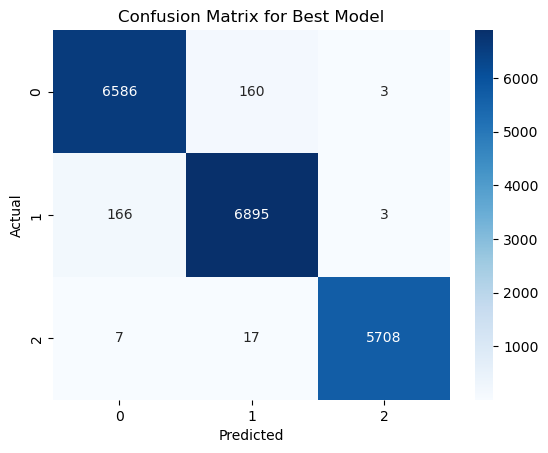

In [29]:
# Get the best model from the full feature dataset
best_model = evaluate_models(X_train_full, X_test_full, y_train, y_test, 'Full Feature')

# Make predictions using the best model
y_pred = best_model.predict(X_test_full)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Best Model")
plt.show()


In conclusion, when trying to assess the mental health factors which may influence an individual's work interest we need to focus on the top 10 features which are mentioned here involving days indoors, changes in habits, occupation, mood swings amongst others. These factors when observed may influence the ability of the individual to perform best at this work places. These features are red flags to work effectiveness